Ce notebook vise à analyser les données concernat les matchs, les joueurs, les terrains ainsi que les équipements de tennis 

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df1 = pd.read_csv('Openchamps_men_nettoye.csv')
df1.drop(columns=['Unnamed: 0'], inplace=True)
df1.head()

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final,Score1_Champion,Score2_Champion,Score3_Champion,Score1_Runner-up,Score2_Runner-up,Score3_Runner-up
0,1969,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5",6,6,7,3,4,5
1,1970,Arthur Ashe,4,USA,Dick Crealy,12,AUS,"6–4, 9–7, 6–2",6,9,6,4,7,2
2,1971,Ken Rosewall,2,AUS,Arthur Ashe,3,USA,"6–1, 7–5, 6–3",6,7,6,1,5,3
3,1972,Ken Rosewall,2,AUS,Malcolm Anderson,8,AUS,"7–6, 6–3, 7–5",7,6,7,6,3,5
4,1973,John Newcombe,2,AUS,Onny Parun,12,NZL,"6–3, 6–7, 7–5",6,6,7,3,7,5


In [4]:
df2 = pd.read_csv('Openchamps_women_nettoye.csv')
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2.head()

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final,Score1_Champion,Score2_Champion,Score1_Runner-up,Score2_Runner-up
0,1969,Margaret Court,2,AUS,Billie Jean King,1,USA,"6–4, 6–1",6.0,6.0,4.0,1.0
1,1970,Margaret Court,1,AUS,Kerry Melville,2,AUS,"6–1, 6–3",6.0,6.0,1.0,3.0
2,1971,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"2–6, 7–6",2.0,7.0,6.0,6.0
3,1972,Virginia Wade,2,GBR,Evonne Goolagong,1,AUS,"6–4, 6–4",6.0,6.0,4.0,4.0
4,1973,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"6–4, 7–5",6.0,7.0,4.0,5.0


I.Analyse Champions 

1.Champion/year pour les hommes et les femmes 

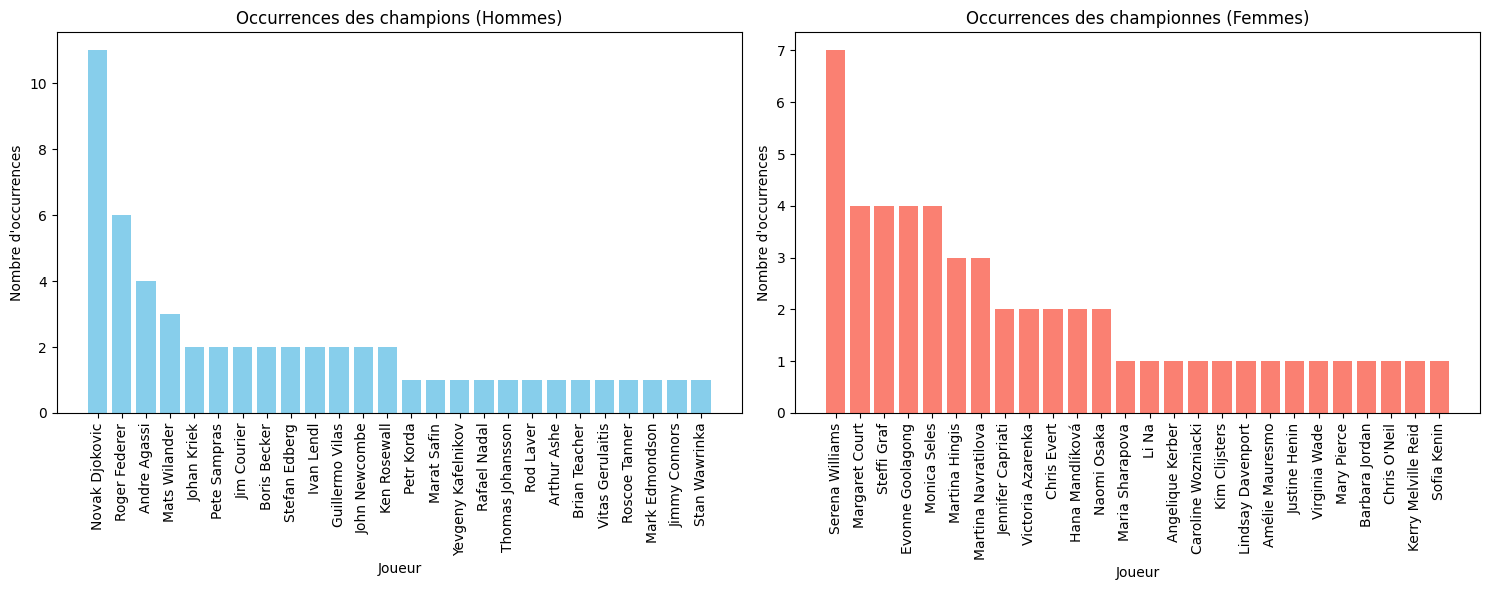

In [6]:
def plot_champion_occurrences(df1, df2):
    df_concat = pd.concat([df1, df2])
    champion_counts_male = df1['Champion'].value_counts()
    champion_counts_female = df2['Champion'].value_counts()
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].bar(champion_counts_male.index, champion_counts_male.values, color='skyblue')
    axs[0].set_title('Occurrences des champions (Hommes)')
    axs[0].set_xlabel('Joueur')
    axs[0].set_ylabel('Nombre d\'occurrences')
    axs[0].tick_params(axis='x', rotation=90)

    axs[1].bar(champion_counts_female.index, champion_counts_female.values, color='salmon')
    axs[1].set_title('Occurrences des championnes (Femmes)')
    axs[1].set_xlabel('Joueur')
    axs[1].set_ylabel('Nombre d\'occurrences')
    axs[1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
plot_champion_occurrences(df1, df2)

----------------------------------   CLASSEMENT   ---------------------------------

1. Dataset 'Openchamps' Classement des champions (hommes et femmes) 

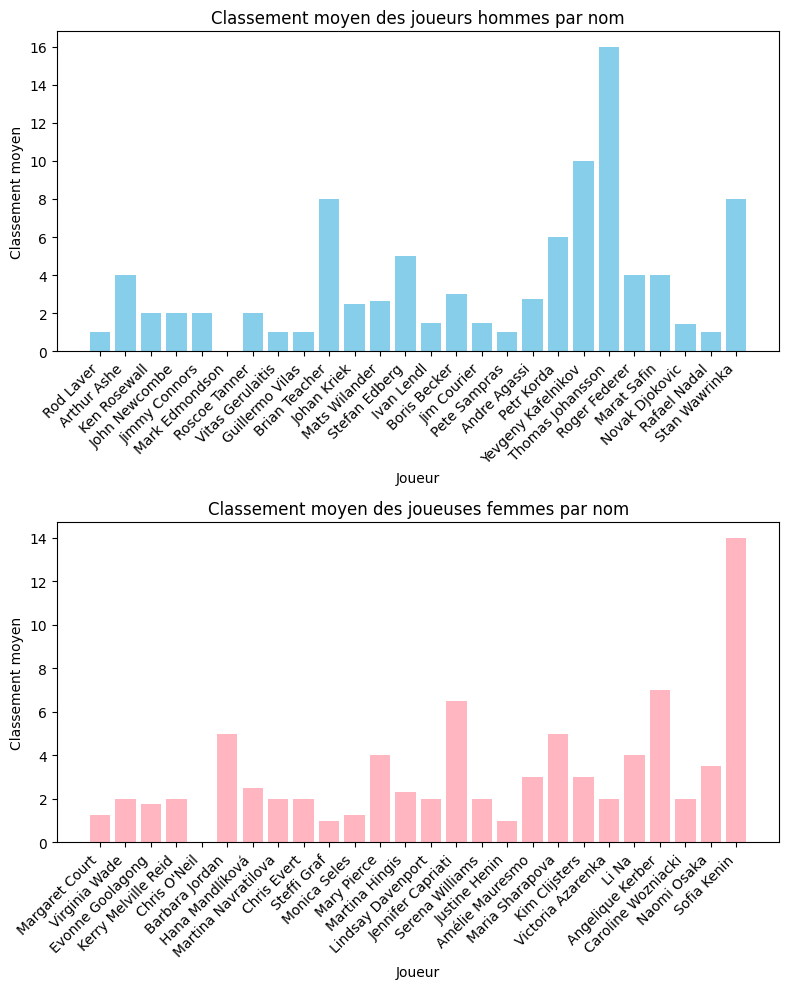

In [99]:
def plot_seed_ranking_by_player(df, title, color):
    seed_ranking_by_player = {}
    for player in df['Champion'].unique():
        seed_ranking = df[df['Champion'] == player]['Seed_Champion'].mean()  
        seed_ranking_by_player[player] = seed_ranking
    plt.bar(seed_ranking_by_player.keys(), seed_ranking_by_player.values(), color=color)
    plt.title(title)
    plt.xlabel('Joueur')
    plt.ylabel('Classement moyen')
    plt.xticks(rotation=45, ha='right')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
plt.sca(ax1)
plot_seed_ranking_by_player(df1, "Classement moyen des joueurs hommes par nom", color='skyblue')
plt.sca(ax2)
plot_seed_ranking_by_player(df2, "Classement moyen des joueuses femmes par nom", color='lightpink')
plt.tight_layout()

Affichage des noms des joueurs/joueuses champions qui sont classés en 1, 2, 3, 4, 5 

Affichage du nombre des joueurs selon le classement 

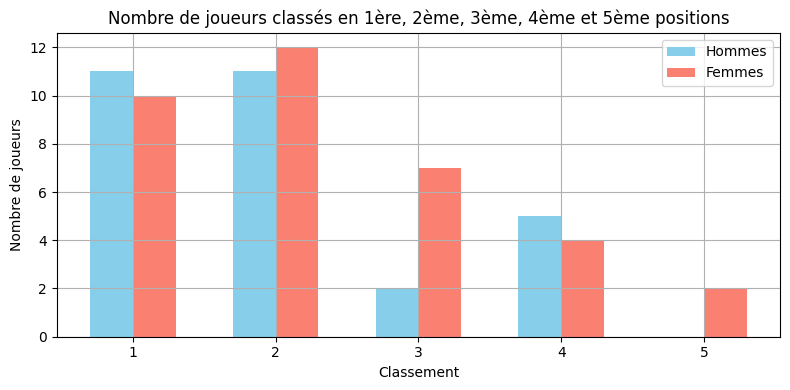

In [100]:
# Hommes
ranks_men = [1, 2, 3, 4, 5]
count_players_men = [len(df1[df1['Seed_Champion'] == rank]['Champion'].unique()) for rank in ranks_men]

# Femmes
ranks_women = [1, 2, 3, 4, 5]
count_players_women = [len(df2[df2['Seed_Champion'] == rank]['Champion'].unique()) for rank in ranks_women]
plt.figure(figsize=(8, 4))
plt.bar([rank - 0.15 for rank in ranks_men], count_players_men, width=0.3, label='Hommes', color='skyblue')
plt.bar([rank + 0.15 for rank in ranks_women], count_players_women, width=0.3, label='Femmes', color='salmon')
plt.title("Nombre de joueurs classés en 1ère, 2ème, 3ème, 4ème et 5ème positions")
plt.xlabel("Classement")
plt.ylabel("Nombre de joueurs")
plt.xticks(ranks_men)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Affichage des noms des joueurs/joueurses selon le classement 

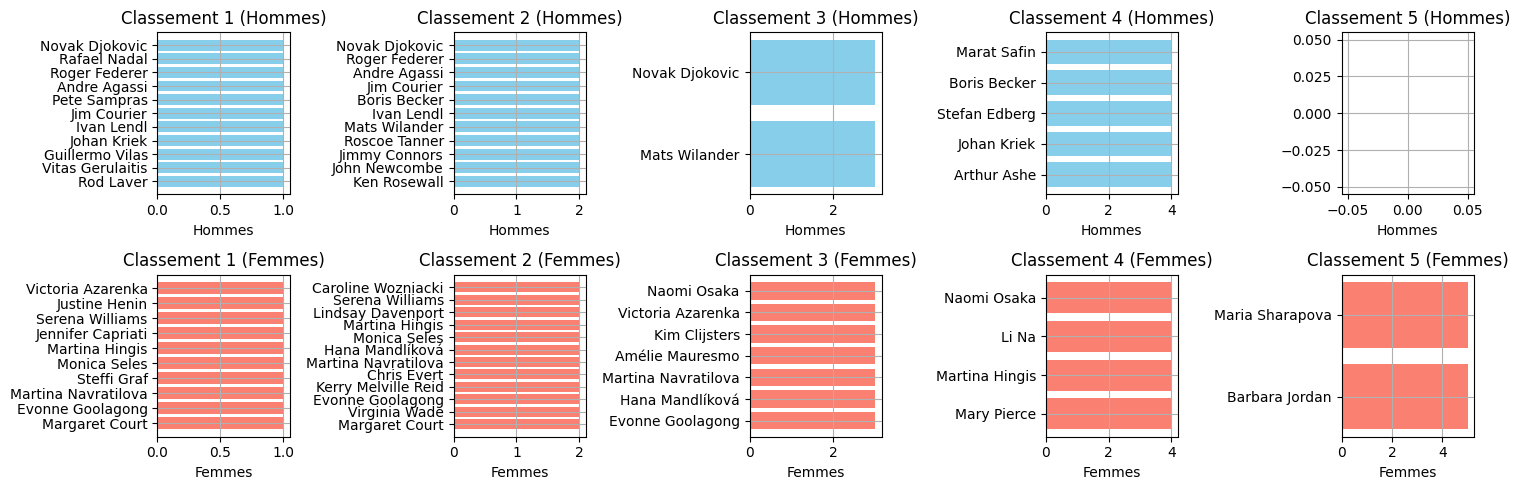

In [101]:
# Hommes
ranks_men = [1, 2, 3, 4, 5]
players_by_rank_men = [df1[df1['Seed_Champion'] == rank]['Champion'].unique() for rank in ranks_men]
# Femmes
ranks_women = [1, 2, 3, 4, 5]
players_by_rank_women = [df2[df2['Seed_Champion'] == rank]['Champion'].unique() for rank in ranks_women]
plt.figure(figsize=(15, 5))
for i, (rank, players) in enumerate(zip(ranks_men, players_by_rank_men), start=1):
    plt.subplot(2, 5, i)
    plt.barh(players, [rank] * len(players), color='skyblue')
    plt.title(f"Classement {rank} (Hommes)")
    plt.xlabel('Hommes')
    plt.grid(True)
for i, (rank, players) in enumerate(zip(ranks_women, players_by_rank_women), start=6):
    plt.subplot(2, 5, i)
    plt.barh(players, [rank] * len(players), color='salmon')
    plt.title(f"Classement {rank} (Femmes)")
    plt.xlabel('Femmes')
    plt.grid(True)
plt.tight_layout()
plt.show()

2. Dataset 'atpwta_Rank_nettoye' Joueurs/Ranking Classemnt actuel des joueurs 

In [14]:
df3 = pd.read_csv('atpwta_Rank_nettoye.csv')
df3

,Player Name,Ranking,Ranking
0,Novak Djokovic,1.0,NaN
1,Rafael Nadal,2.0,NaN
2,Roger Federer,3.0,NaN
3,Dominic Thiem,4.0,NaN
4,Daniil Medvedev,5.0,NaN
...,...,...,...
171,Astra Sharma,NaN,95.0
172,Anna Karolina Schmiedlova,NaN,96.0
173,Aleksandra Krunic,NaN,97.0
174,Natalia Vikhlyantseva,NaN,98.0


C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\4185908911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['Ranking'] = df_men['Ranking'].astype(int)
C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\4185908911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women[' Ranking'] = df_women[' Ranking'].astype(int)
C:\Users\sonia\AppData\Local\Temp\ipykernel_6276\4185908911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

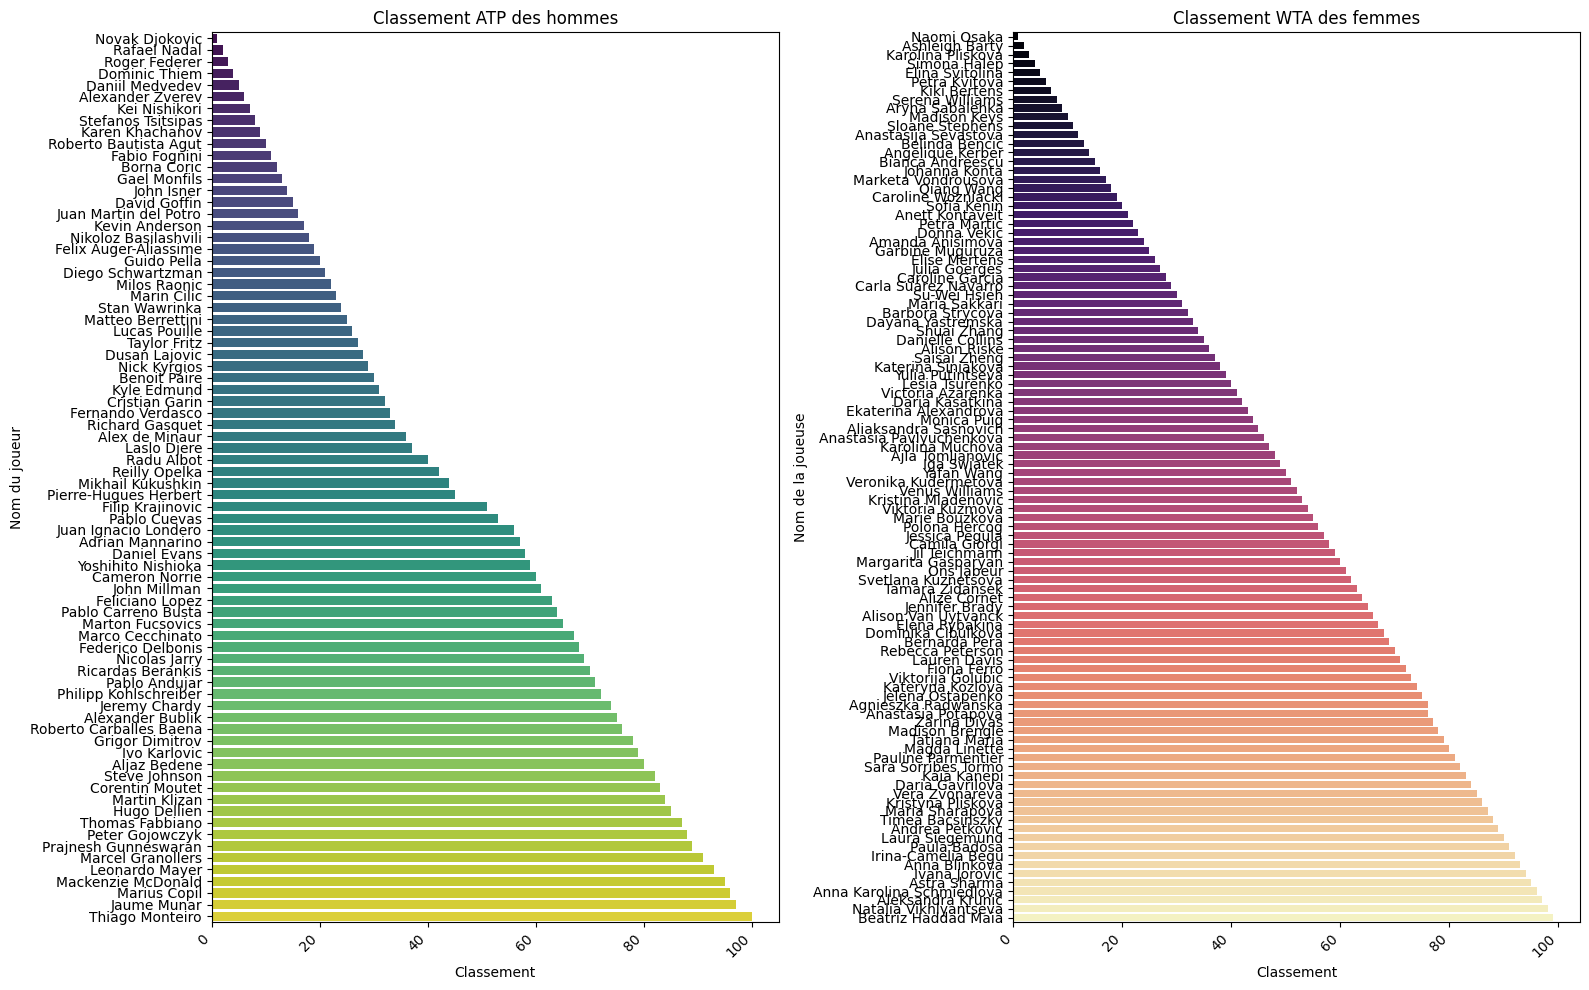

In [20]:
df_men = df3.dropna(subset=['Ranking'])
df_women = df3.dropna(subset=[' Ranking'])

df_men['Ranking'] = df_men['Ranking'].astype(int)
df_women[' Ranking'] = df_women[' Ranking'].astype(int)
plt.figure(figsize=(16, 10))
#graphe homme 
plt.subplot(1, 2, 1)
sns.barplot(y='Player Name', x='Ranking', data=df_men, palette='viridis')
plt.title('Classement ATP des hommes')
plt.xlabel('Classement')
plt.ylabel('Nom du joueur')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.25, bottom=0.25, right=0.95, top=0.95, wspace=0.5)
#graphe femmes
plt.subplot(1, 2, 2)
sns.barplot(y='Player Name', x=' Ranking', data=df_women, palette='magma')
plt.title('Classement WTA des femmes')
plt.xlabel('Classement')
plt.ylabel('Nom de la joueuse')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.25, bottom=0.25, right=0.95, top=0.95, wspace=0.5)
plt.tight_layout()
plt.show()

-------------------------- FIN CLASSEMENT ---------------

3.Champion / Pays

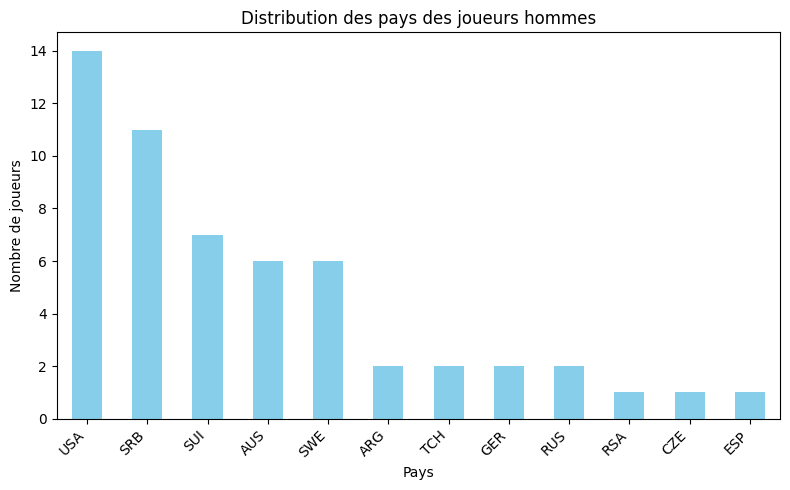

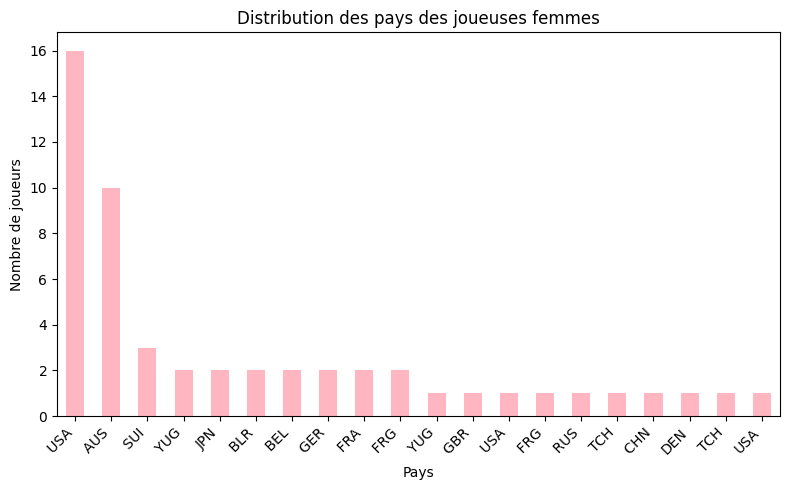

In [102]:
def plot_country_distribution(df, title, color):
    country_counts = df['Ctry_Champion'].value_counts()
    plt.figure(figsize=(8, 5))
    country_counts.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel('Pays')
    plt.ylabel('Nombre de joueurs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_country_distribution(df1, "Distribution des pays des joueurs hommes", color='skyblue')
plot_country_distribution(df2, "Distribution des pays des joueuses femmes", color='lightpink')

4.Champion / Score1(2,3)_Champion

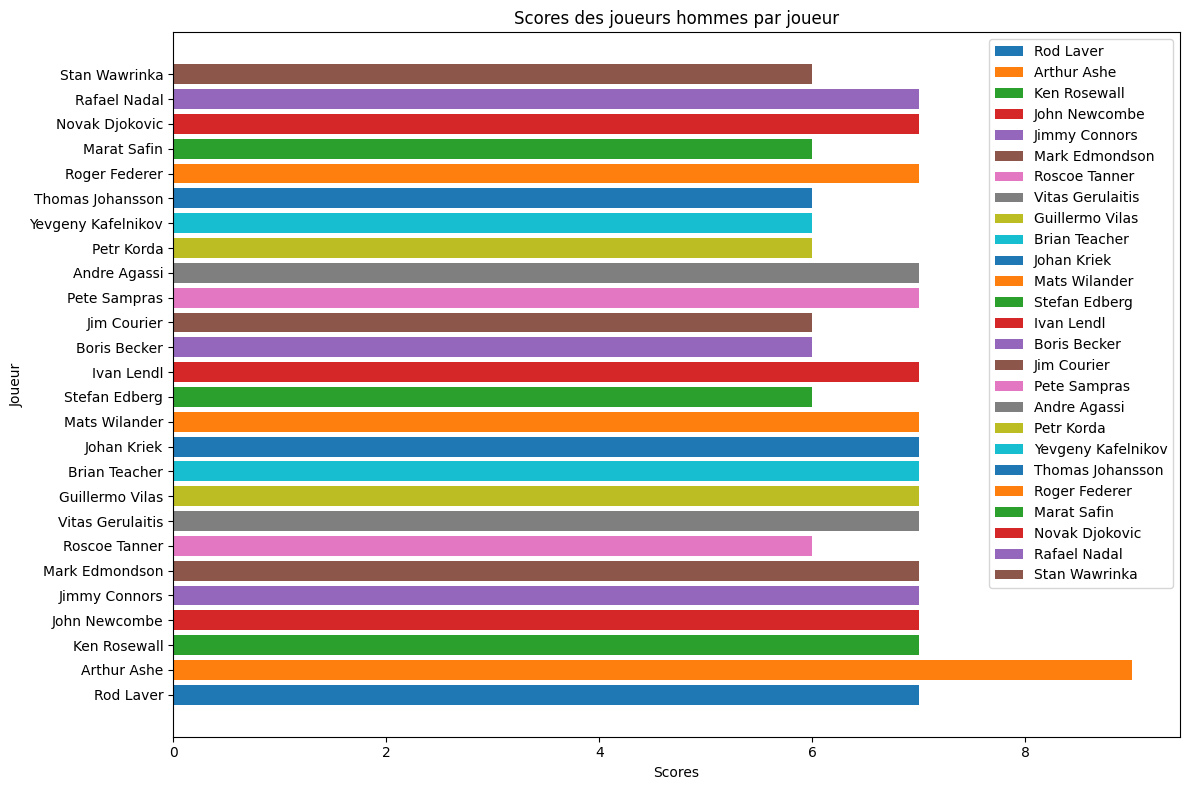

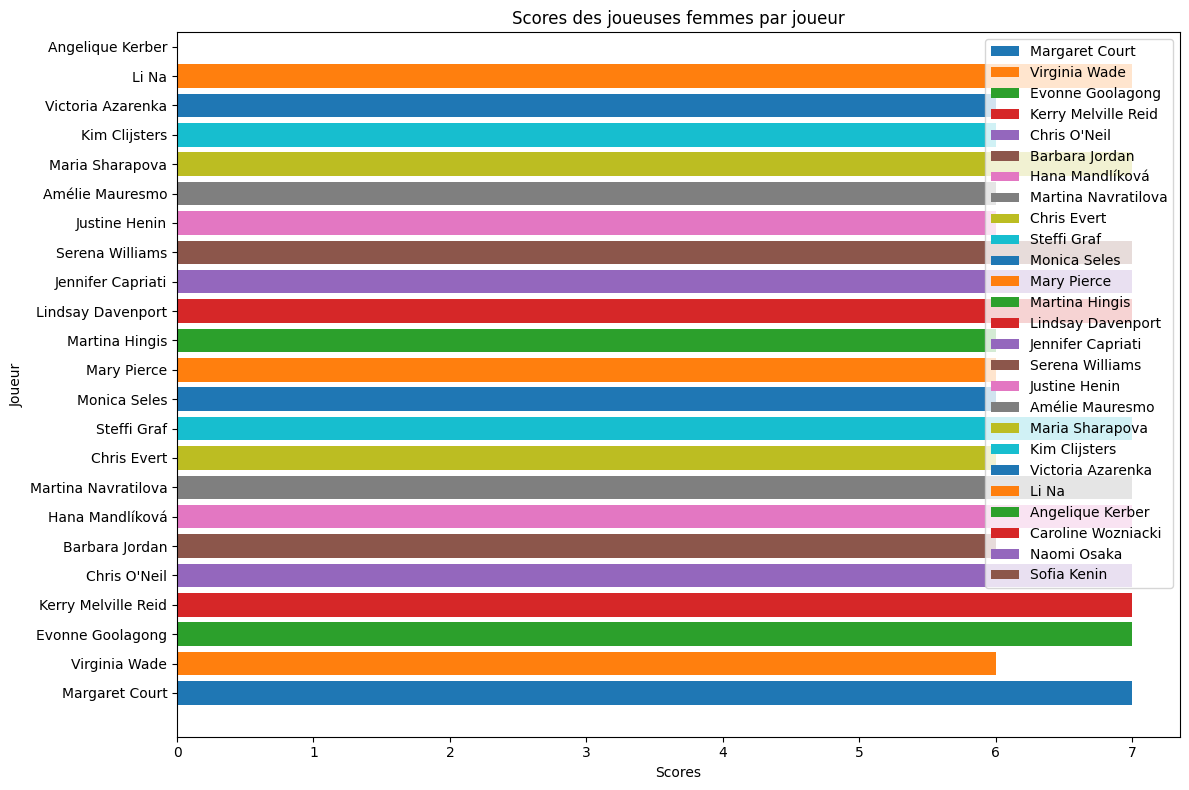

In [103]:
def plot_scores(df, title):
    score_columns = ['Score1_Champion', 'Score2_Champion', 'Score3_Champion'] if 'Score3_Champion' in df.columns else ['Score1_Champion', 'Score2_Champion']
    player_scores = [(player, df[df['Champion'] == player][score_columns].values.flatten()) for player in df['Champion'].unique()]
    plt.figure(figsize=(12, 8))
    for player, scores in player_scores:
        plt.barh(player, scores, label=player)
    plt.title(title)
    plt.xlabel('Scores')
    plt.ylabel('Joueur')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_scores(df1, "Scores des joueurs hommes par joueur")
plot_scores(df2, "Scores des joueuses femmes par joueur")

--------------------------------------------------------------------Champion Fin ---------------------------------------------------------------

II.Analyse Runner-Up = Finalistes hommes et femmes 


1.Runner-Up / Occurences par années 

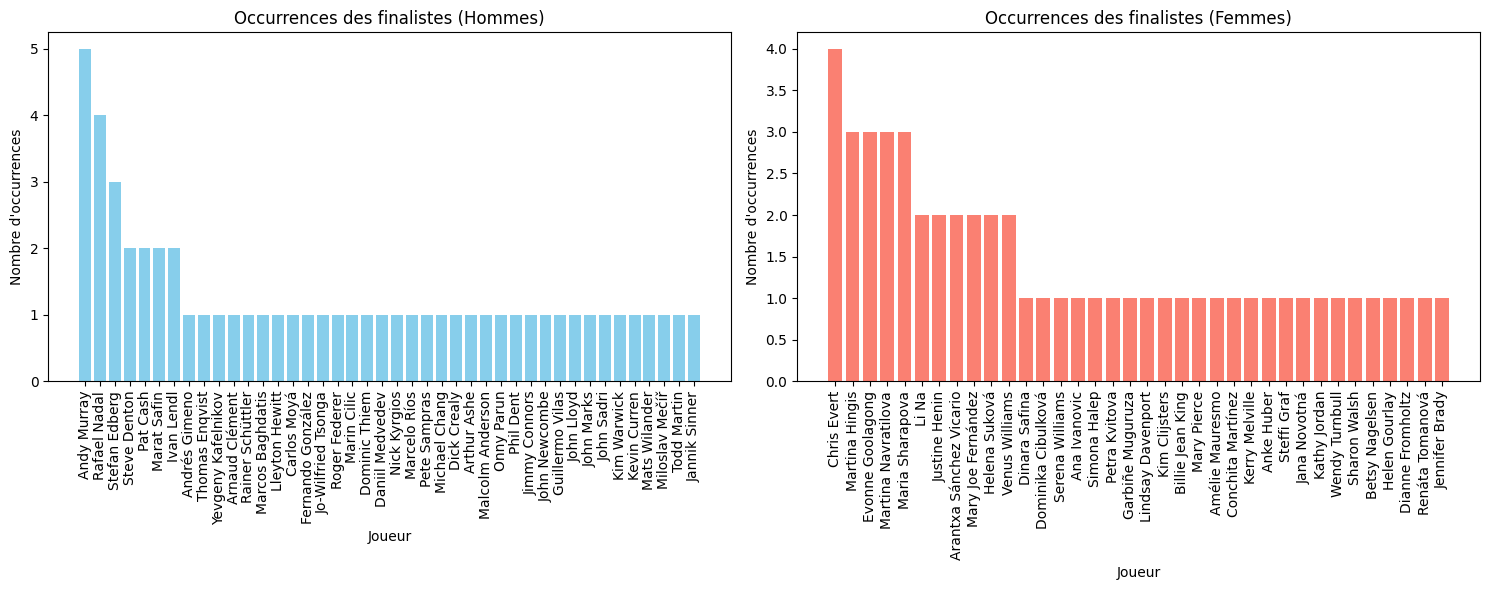

In [104]:
def plot_runner_up_occurrences(df1, df2):
    df_concat = pd.concat([df1, df2])
    runner_up_counts_male = df1['Runner-up'].value_counts()
    runner_up_counts_female = df2['Runner-up'].value_counts()
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].bar(runner_up_counts_male.index, runner_up_counts_male.values, color='skyblue')
    axs[0].set_title('Occurrences des finalistes (Hommes)')
    axs[0].set_xlabel('Joueur')
    axs[0].set_ylabel('Nombre d\'occurrences')
    axs[0].tick_params(axis='x', rotation=90)

    axs[1].bar(runner_up_counts_female.index, runner_up_counts_female.values, color='salmon')
    axs[1].set_title('Occurrences des finalistes (Femmes)')
    axs[1].set_xlabel('Joueur')
    axs[1].set_ylabel('Nombre d\'occurrences')
    axs[1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
plot_runner_up_occurrences(df1, df2)

-------------------------------  Classement ---------------------------

1.Runner-up /Seed_Runner-up_ = classements général des finalistes 

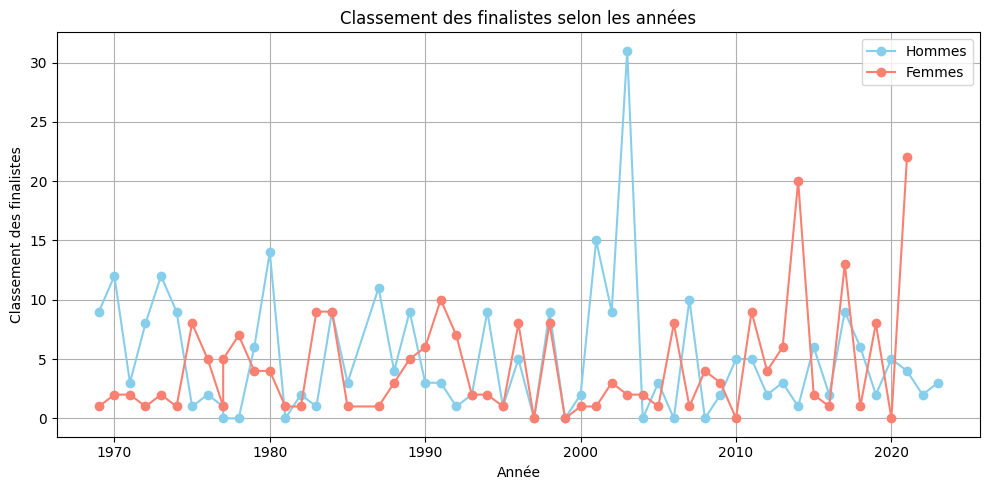

In [105]:
def plot_seed_ranking(df1, df2):
    plt.figure(figsize=(10, 5))
    plt.plot(df1['Year'], df1['Seed_Runner-up'], marker='o', linestyle='-', color='skyblue', label='Hommes')
    plt.plot(df2['Year'], df2['Seed_Runner-up'], marker='o', linestyle='-', color='salmon', label='Femmes')
    plt.title('Classement des finalistes selon les années')
    plt.xlabel('Année')
    plt.ylabel('Classement des finalistes')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_seed_ranking(df1, df2)

2.Nombre de joueurs/joueuses finalistes par le classement

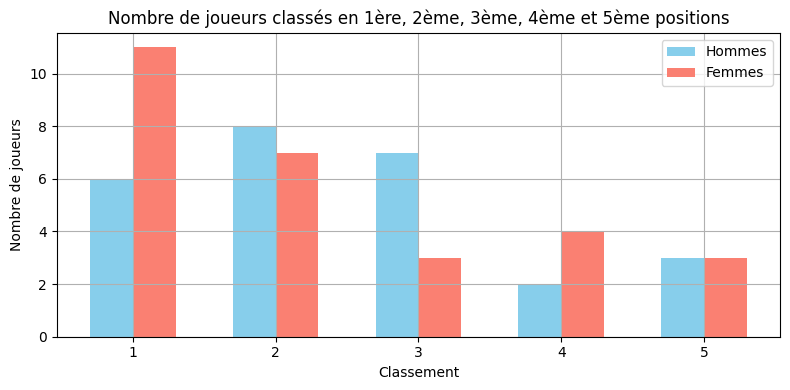

In [106]:
# Hommes
ranks_men = [1, 2, 3, 4, 5]
count_players_men = [len(df1[df1['Seed_Runner-up'] == rank]['Runner-up'].unique()) for rank in ranks_men]

# Femmes
ranks_women = [1, 2, 3, 4, 5]
count_players_women = [len(df2[df2['Seed_Runner-up'] == rank]['Runner-up'].unique()) for rank in ranks_women]
plt.figure(figsize=(8, 4))
plt.bar([rank - 0.15 for rank in ranks_men], count_players_men, width=0.3, label='Hommes', color='skyblue')
plt.bar([rank + 0.15 for rank in ranks_women], count_players_women, width=0.3, label='Femmes', color='salmon')
plt.title("Nombre de joueurs classés en 1ère, 2ème, 3ème, 4ème et 5ème positions")
plt.xlabel("Classement")
plt.ylabel("Nombre de joueurs")
plt.xticks(ranks_men)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3.Noms des finalistes selon leurs classements 

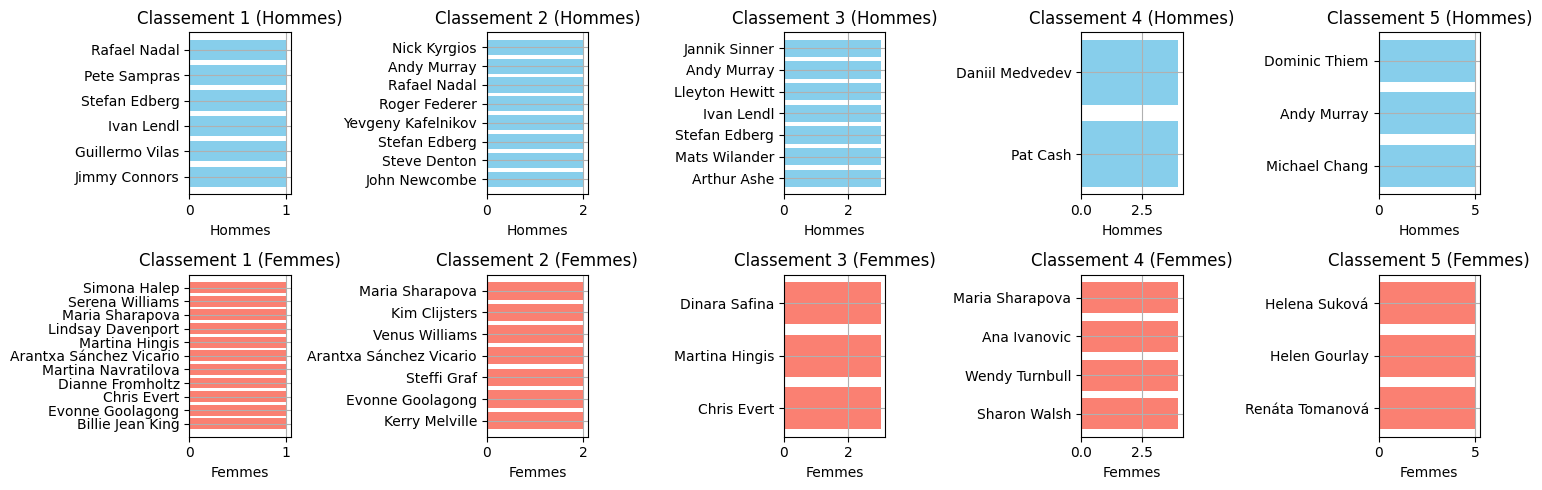

In [107]:
# Hommes
ranks_men = [1, 2, 3, 4, 5]
players_by_rank_men = [df1[df1['Seed_Runner-up'] == rank]['Runner-up'].unique() for rank in ranks_men]
# Femmes
ranks_women = [1, 2, 3, 4, 5]
players_by_rank_women = [df2[df2['Seed_Runner-up'] == rank]['Runner-up'].unique() for rank in ranks_women]
plt.figure(figsize=(15, 5))
for i, (rank, players) in enumerate(zip(ranks_men, players_by_rank_men), start=1):
    plt.subplot(2, 5, i)
    plt.barh(players, [rank] * len(players), color='skyblue')
    plt.title(f"Classement {rank} (Hommes)")
    plt.xlabel('Hommes')
    plt.grid(True)
for i, (rank, players) in enumerate(zip(ranks_women, players_by_rank_women), start=6):
    plt.subplot(2, 5, i)
    plt.barh(players, [rank] * len(players), color='salmon')
    plt.title(f"Classement {rank} (Femmes)")
    plt.xlabel('Femmes')
    plt.grid(True)
plt.tight_layout()
plt.show()

--------------------------------- Fin Classement ---------------------------

Runner-up / country

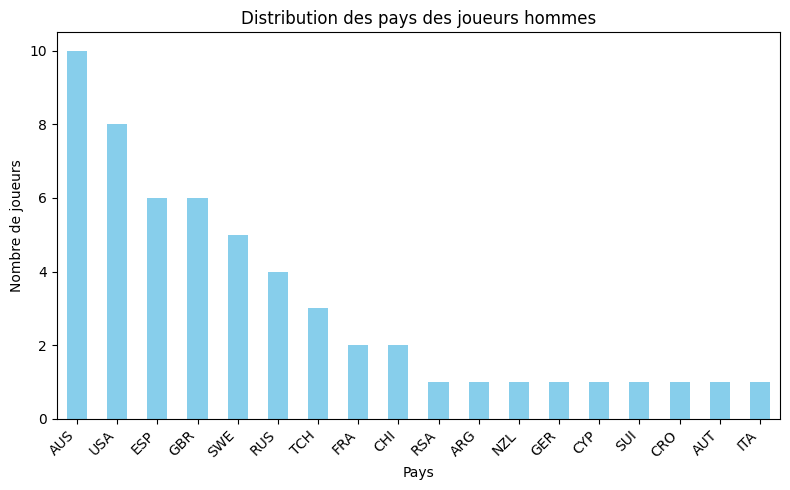

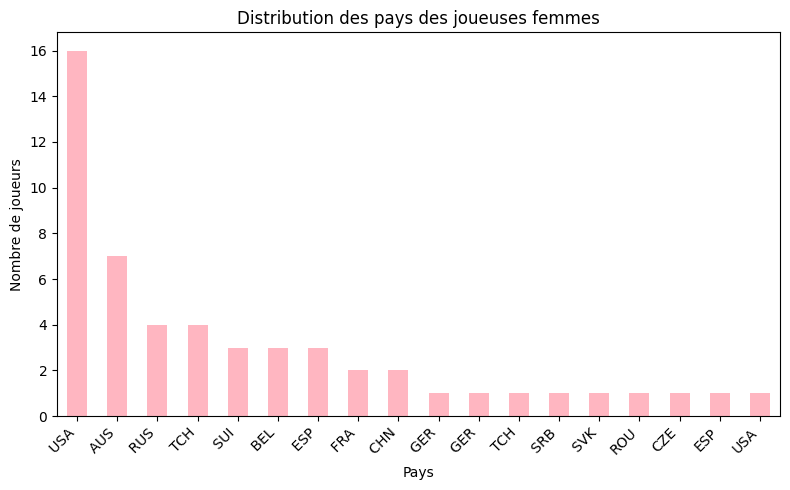

In [108]:
def plot_countryrunnerup_distribution(df, title, color):
    country_counts = df['Ctry_Runner-up'].value_counts()
    plt.figure(figsize=(8, 5))
    country_counts.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel('Pays')
    plt.ylabel('Nombre de joueurs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_countryrunnerup_distribution(df1, "Distribution des pays des joueurs hommes", color='skyblue')
plot_countryrunnerup_distribution(df2, "Distribution des pays des joueuses femmes", color='lightpink')

Runner-up / Scores 

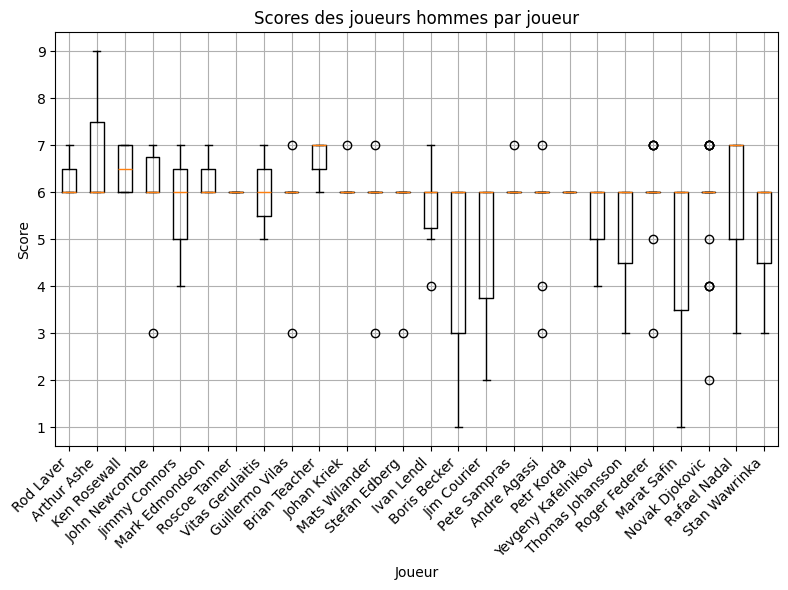

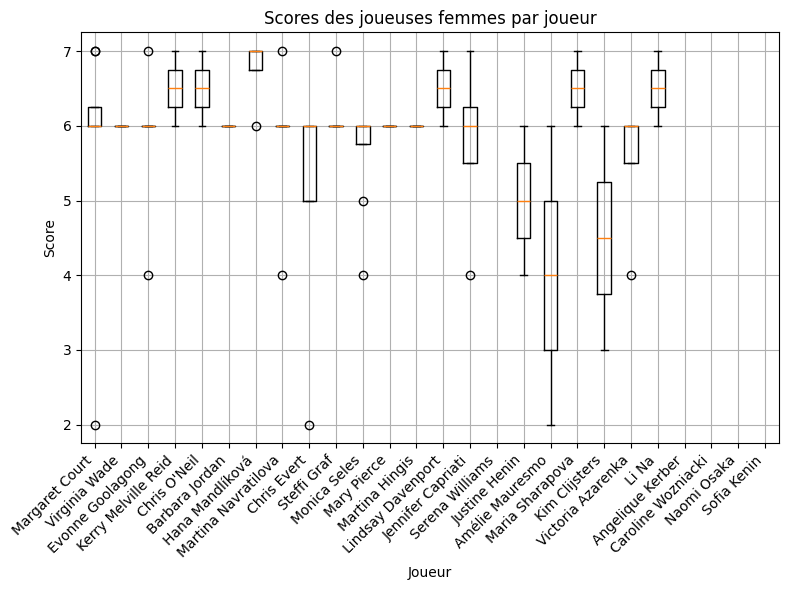

In [109]:
def plot_scores_boxplot(df, title):
    score_columns = ['Score1_Champion', 'Score2_Champion']
    if 'Score3_Champion' in df.columns:
        score_columns.append('Score3_Champion')
    player_scores = [df[df['Champion'] == player][score_columns].values.flatten() for player in df['Champion'].unique()]
    
    plt.figure(figsize=(8, 6))
    plt.boxplot(player_scores, labels=df['Champion'].unique())
    plt.title(title)
    plt.xlabel('Joueur')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')  
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_scores_boxplot(df1, "Scores des joueurs hommes par joueur")
plot_scores_boxplot(df2, "Scores des joueuses femmes par joueur")

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

III.Comparaison entre le classement d'un champion et celui d'un finaliste 

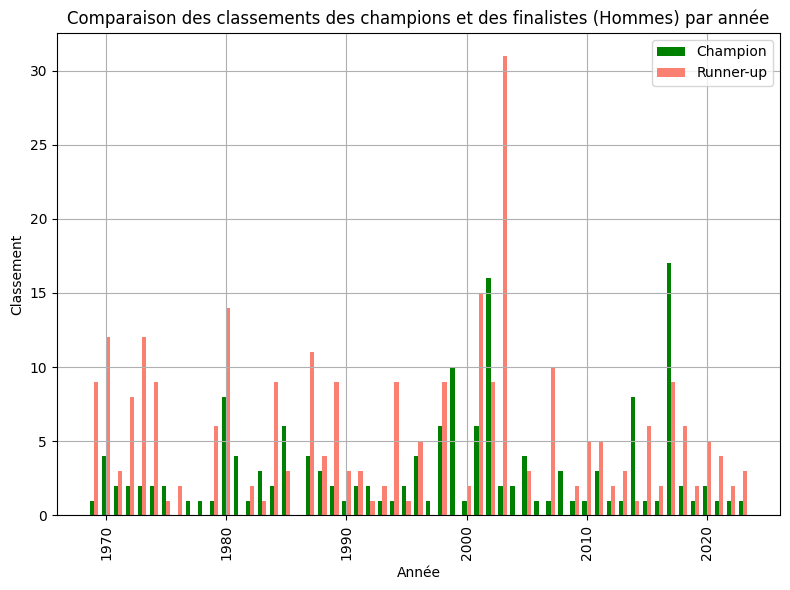

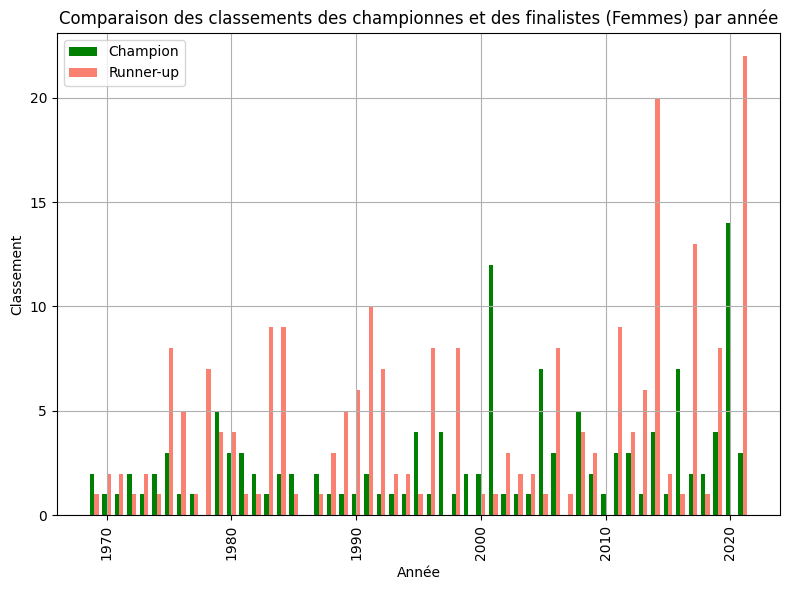

In [110]:
def plot_rank_comparison(df, title):
    data = df[['Year', 'Seed_Champion', 'Seed_Runner-up']]
    grouped_data = data.groupby('Year').agg({'Seed_Champion': 'min', 'Seed_Runner-up': 'min'})
    grouped_data = grouped_data.sort_index()
    plt.figure(figsize=(8, 6))
    bar_width = 0.35
    index = grouped_data.index
    champion_rankings = grouped_data['Seed_Champion']
    runner_up_rankings = grouped_data['Seed_Runner-up']
    plt.bar(index - bar_width/2, champion_rankings, bar_width, label='Champion', color='green')
    plt.bar(index + bar_width/2, runner_up_rankings, bar_width, label='Runner-up', color='salmon')

    plt.title(title)
    plt.xlabel('Année')
    plt.ylabel('Classement')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_rank_comparison(df1, "Comparaison des classements des champions et des finalistes (Hommes) par année")
plot_rank_comparison(df2, "Comparaison des classements des championnes et des finalistes (Femmes) par année")

------------------------------------------------ Fin ---------------------------------------------------------------------